(-4.058631209647063, 4.117395258804836, -4.309480492130218, 5.167561533094499)

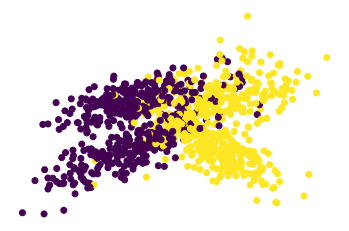

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

np.random.seed(42)
X, y = make_classification(n_samples=100000, n_features=2, n_informative=2, n_redundant=0)
n_train_samples = 1000

X_train, y_train = X[:n_train_samples], y[:n_train_samples]
X_test, y_test = X[n_train_samples:], y[n_train_samples:]

import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.axis('off')

In [2]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

# For binary classification tasks predict_proba returns a matrix containing the first class proba in the first entry,
# and the second class proba in the second entry. Since there are only two classes one is just 1 - n of the other.
# The calibration_curve implementation expects just one of these classes in an array, so we index that.
y_test_predict_proba = clf.predict_proba(X_test)[:, 1]

from sklearn.calibration import calibration_curve
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

In [3]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# For binary classification tasks predict_proba returns a matrix containing the first class proba in the first entry,
# and the second class proba in the second entry. Since there are only two classes one is just 1 - n of the other.
# The calibration_curve implementation expects just one of these classes in an array, so we index that.
y_test_predict_proba = clf.predict_proba(X_test)[:, 1]

from sklearn.calibration import calibration_curve
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

In [11]:
yhat = clf.predict(X_test)

In [4]:
clf.predict_proba(X_test)[:21]

array([[0.54, 0.46],
       [0.99, 0.01],
       [0.12, 0.88],
       [1.  , 0.  ],
       [0.07, 0.93],
       [0.49, 0.51],
       [0.03, 0.97],
       [0.21, 0.79],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.23, 0.77],
       [0.06, 0.94],
       [0.05, 0.95],
       [0.95, 0.05],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.46, 0.54],
       [0.38, 0.62],
       [0.87, 0.13],
       [0.26, 0.74]])

In [5]:
y_test[:21]

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [13]:
yhat[:21]

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [14]:
pd.DataFrame({"prob": clf.predict_proba(X_test)[:21, 1], "yhat": yhat[:21], "actual": y_test[:21]})

,prob,yhat,actual
0,0.46,0,1
1,0.01,0,0
2,0.88,1,1
3,0.00,0,0
4,0.93,1,1
5,0.51,1,0
6,0.97,1,1
7,0.79,1,1
8,0.00,0,0
9,0.00,0,0


In [6]:
fraction_of_positives

array([0.04415973, 0.17270341, 0.25066964, 0.38773906, 0.48911268,
       0.57209302, 0.67675545, 0.71561051, 0.79329694, 0.95340787])

In [7]:
mean_predicted_value

array([0.01984196, 0.15097463, 0.25298884, 0.35466859, 0.4559227 ,
       0.55722093, 0.65659806, 0.75540787, 0.85789354, 0.98186957])